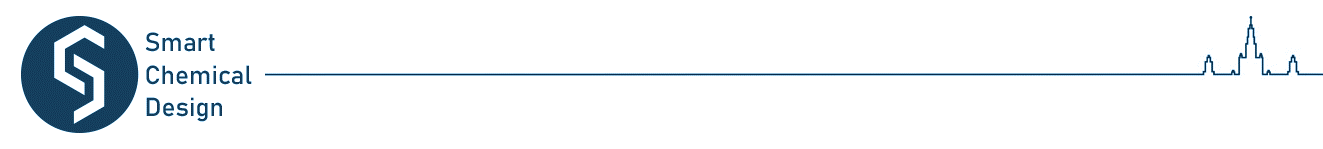

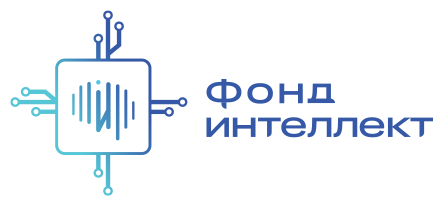

<h1>Обработка данных с помощью Python</h1>
Практикум посвящен обработке данных с использованием возможностей языка Python и сторонних библиотек

Датасет dataset.csv
<ul>
<li>Molecular weight</li>
<li>Normal boiling point</li>
<li>Melting point</li>
<li>Critical temperature</li>
<li>Critical pressure</li>
<li>Critical volume</li>
<li>Heat of fusion</li>
<li>logP</li>
<li>Molecular refractivity</li>
</ul>

Ваши друзья
<ul>
<li>Numpy</li>
<li>Pandas</li>
<li>Matplotlib</li>
<li>Преподаватели</li>
</ul>

Что хотим увидеть?
Полный цикл работы с данными - очистка, анализ, построение гистограмм распределения различных величин, поиск взаимосвязей.
Характеристики приведенных в таблице величин и их связей с другими величинами, преобразование предложенных данных (различные размерности, перевод в категориальные и т.п.)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/dataset.csv")
data.head()

,Unnamed: 0,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
0,0,C(Cl)(Cl)(Cl)Cl,153.8227,349.85,250.15,556.3,4540000.0,0.000276,NaN,2.5529,26.1430
1,1,C1=CC=C(C=C1)N,93.12648,457.25,267.15,705.0,5630000.0,0.000291,NaN,1.2687999999999997,30.8544
2,2,CCO,46.06844,351.39,159.05,514.0,6137000.0,0.000168,NaN,-0.0014000000000000123,12.7598
3,3,CO,32.04186,337.65,175.15,512.5,8084000.0,0.000117,NaN,-0.3915,8.1428
4,4,CC(C)O,60.09502,355.36,183.65,508.3,4764000.0,0.000222,NaN,0.38710000000000006,17.3548


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              513 non-null    int64  
 1   smiles                  513 non-null    object 
 2   Molecular weight        512 non-null    object 
 3   Normal boiling point    503 non-null    object 
 4   Melting point           507 non-null    object 
 5   Critical temperature    500 non-null    object 
 6   Critical pressure       500 non-null    object 
 7   Critical volume         497 non-null    float64
 8   Heat of fusion          39 non-null     float64
 9   logP                    510 non-null    object 
 10  Molecular refractivity  511 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 44.2+ KB


# Очистка данных

In [5]:
data = data.replace({'"':''}, regex=True)

In [6]:
data[data['Unnamed: 0'] == 233]

,Unnamed: 0,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
233,233,[Kr],83.798,119.735,115.78,209.4,5501947.5,0.000091,NaN,0.0,0.0


In [7]:
cols = list(data.columns)
num_cols = cols[2:]

data[num_cols] = data[num_cols].apply(pd.to_numeric, errors='coerce')

Количество NaNов

In [8]:
data.isnull().sum()

Unnamed: 0                  0
smiles                      0
Molecular weight            1
Normal boiling point       11
Melting point               7
Critical temperature       13
Critical pressure          13
Critical volume            16
Heat of fusion            474
logP                        4
Molecular refractivity      2
dtype: int64

#Все данные

## Гистограммы

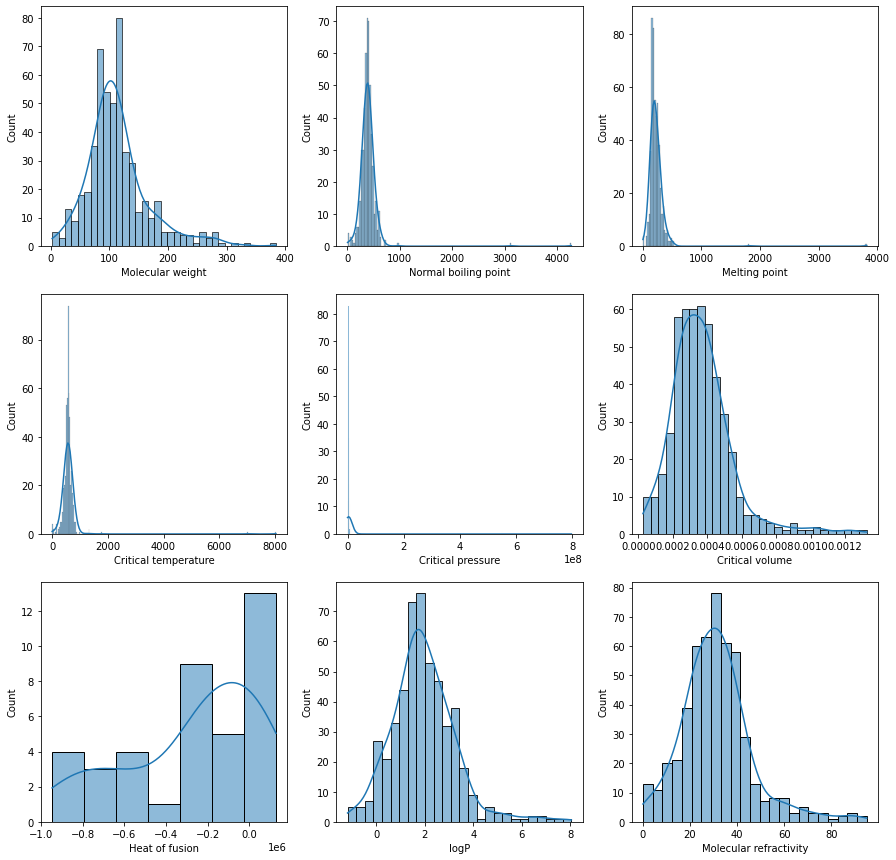

In [9]:
n_rows=3
n_cols=3
# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 15)
for i, column in enumerate(num_cols):
    sns.histplot(data[column], ax=axes[i//n_cols,i%n_cols], kde=True)


Critical pressure


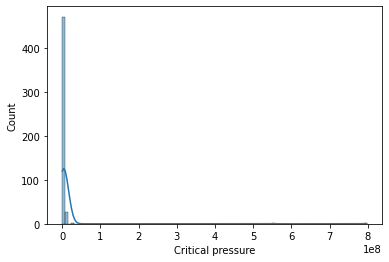

In [10]:
sns.histplot(data['Critical pressure'], bins=100, kde=True)

##  Корреляция

При расчете корреляций не использовалась колонка `'Heat of fusion'`, так как там мало значений



In [11]:
num_cols
num_cols_2 = list(num_cols)
num_cols_2.remove('Heat of fusion')

In [12]:
data_val = data[num_cols_2]
data_corr = data_val.corr().unstack().sort_values(ascending=False)[8::2]
# считается не R^2, а Pearson correlation coefficient (r), для линейной зависимости R^2 = r^2  
data_corr = data_corr **2
data_corr

Molecular refractivity  Critical volume           0.922557
Critical temperature    Normal boiling point      0.910479
Normal boiling point    Melting point             0.875090
Critical pressure       Critical temperature      0.844461
                        Melting point             0.810709
Normal boiling point    Critical pressure         0.805121
Melting point           Critical temperature      0.757808
Critical volume         logP                      0.687879
logP                    Molecular refractivity    0.686555
Molecular refractivity  Molecular weight          0.630043
logP                    Molecular weight          0.525204
Critical volume         Molecular weight          0.511247
Molecular refractivity  Normal boiling point      0.077255
Critical volume         Normal boiling point      0.037290
logP                    Normal boiling point      0.028121
Normal boiling point    Molecular weight          0.025514
Melting point           Molecular refractivity    0.0201

Возьмем первые 12 пар, где $R^2 > 0.5$

In [13]:
list_corr = data_corr.index.to_list()[:12]

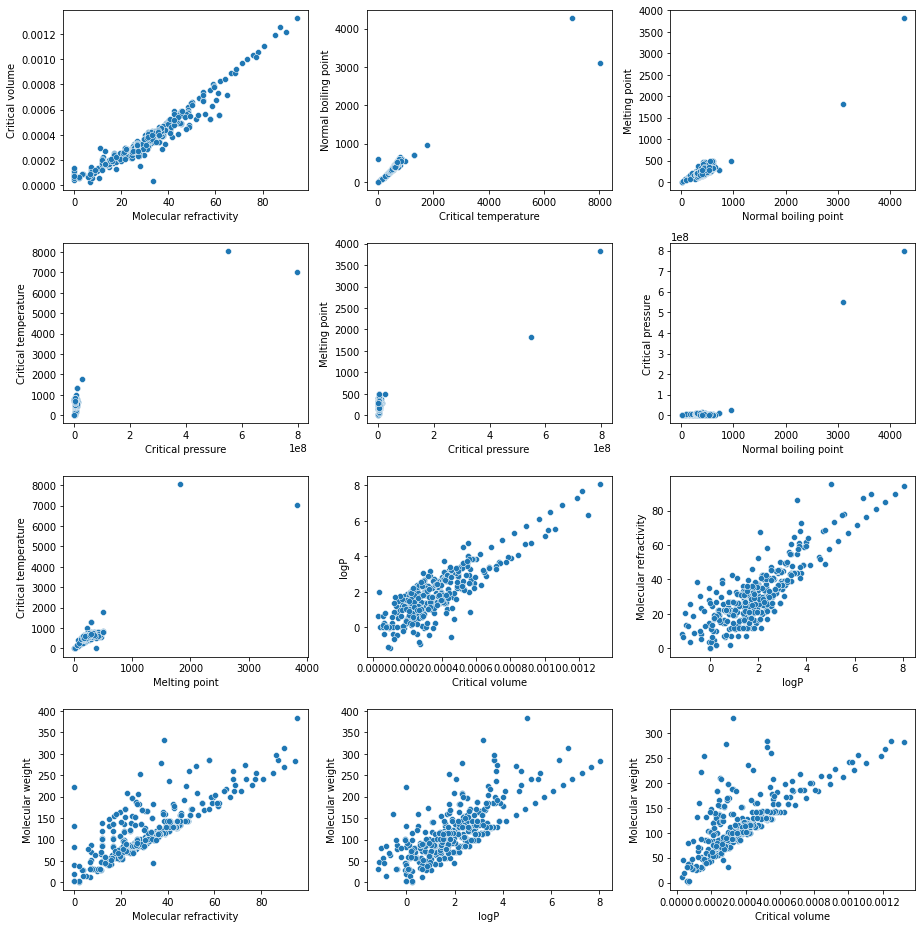

In [14]:
fig = plt.subplots(figsize=(13,13))
count = 1
for i, lst in enumerate(list_corr):
    plt.subplot(4,3,count)
    sns.scatterplot(x=data_val[list_corr[i][0]],y=data_val[list_corr[i][1]])
    count+=1

plt.tight_layout()
plt.show()

Есть выпадающие значения (как и на гистограммах), построим графики без них

# Данные без двух веществ

In [15]:
data.sort_values(['Critical pressure'], ascending=False).head(5)

,Unnamed: 0,smiles,Molecular weight,Normal boiling point,Melting point,Critical temperature,Critical pressure,Critical volume,Heat of fusion,logP,Molecular refractivity
11,11,C,12.01070,4273.15,3823.150,7020.50,796719000.0,0.000027,NaN,0.6361,6.7310
331,331,Sc1ccccc1,44.95591,3109.15,1814.150,8035.08,549900000.0,0.000036,0.0,1.9753,33.6940
248,248,[Se],78.96000,958.15,493.950,1766.00,27155100.0,0.000064,0.0,-0.3808,5.7540
136,136,NN,32.04516,386.70,275.150,653.00,14692125.0,0.000096,NaN,-1.1812,8.3748
241,241,[S],32.06500,717.76,286.405,1314.00,11753700.0,0.000057,0.0,0.6482,7.5910


## Гистограммы

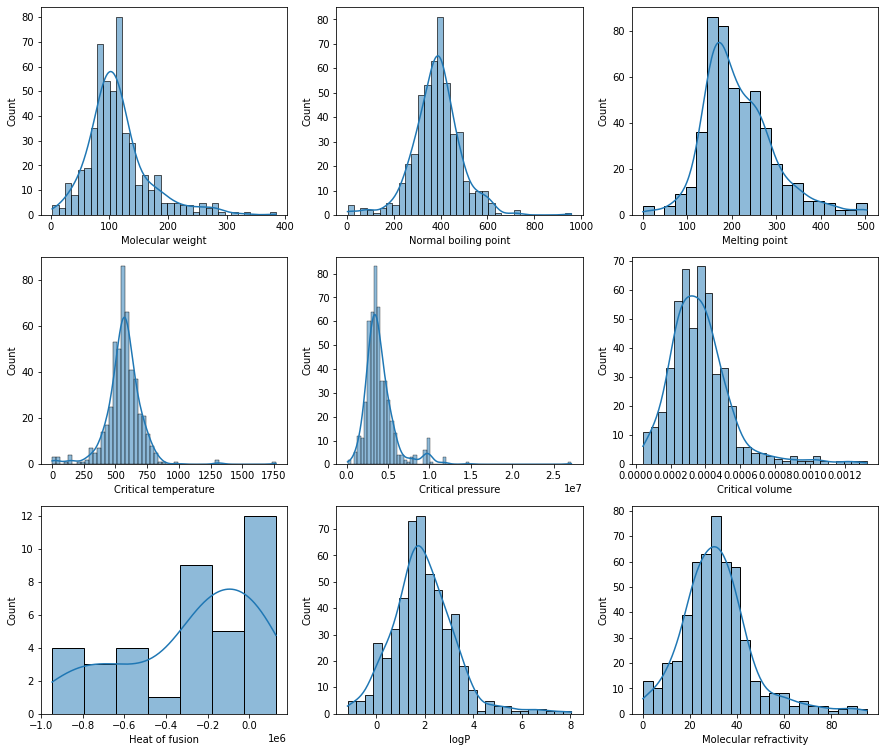

In [16]:
data_c = data[(data['Unnamed: 0'] != 11) & ((data['Unnamed: 0'] != 331))]
n_rows=3
n_cols=3


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(15, 13)
for i, column in enumerate(num_cols):
    sns.histplot(data_c[column], ax=axes[i//n_cols,i%n_cols], kde=True)

## Корреляция

In [17]:
data_c = data_c[num_cols_2]
data_corr_c = data_c.corr().unstack().sort_values(ascending=False)[8::2]
data_corr_c = data_corr_c **2
data_corr_c

Molecular refractivity  Critical volume           0.929767
Normal boiling point    Critical temperature      0.845919
logP                    Critical volume           0.692513
                        Molecular refractivity    0.686193
Molecular refractivity  Molecular weight          0.630867
Normal boiling point    Molecular refractivity    0.566018
Molecular weight        logP                      0.526399
Melting point           Normal boiling point      0.520454
Critical volume         Molecular weight          0.506235
                        Normal boiling point      0.480087
Critical temperature    Melting point             0.446688
Normal boiling point    Molecular weight          0.347767
Molecular refractivity  Critical temperature      0.314467
Melting point           Molecular refractivity    0.242994
Critical volume         Critical temperature      0.242032
Molecular weight        Melting point             0.239982
                        Critical temperature      0.2146

In [18]:
list_corr_c = data_corr_c.index.to_list()
val_corr_c = data_corr_c.to_list()

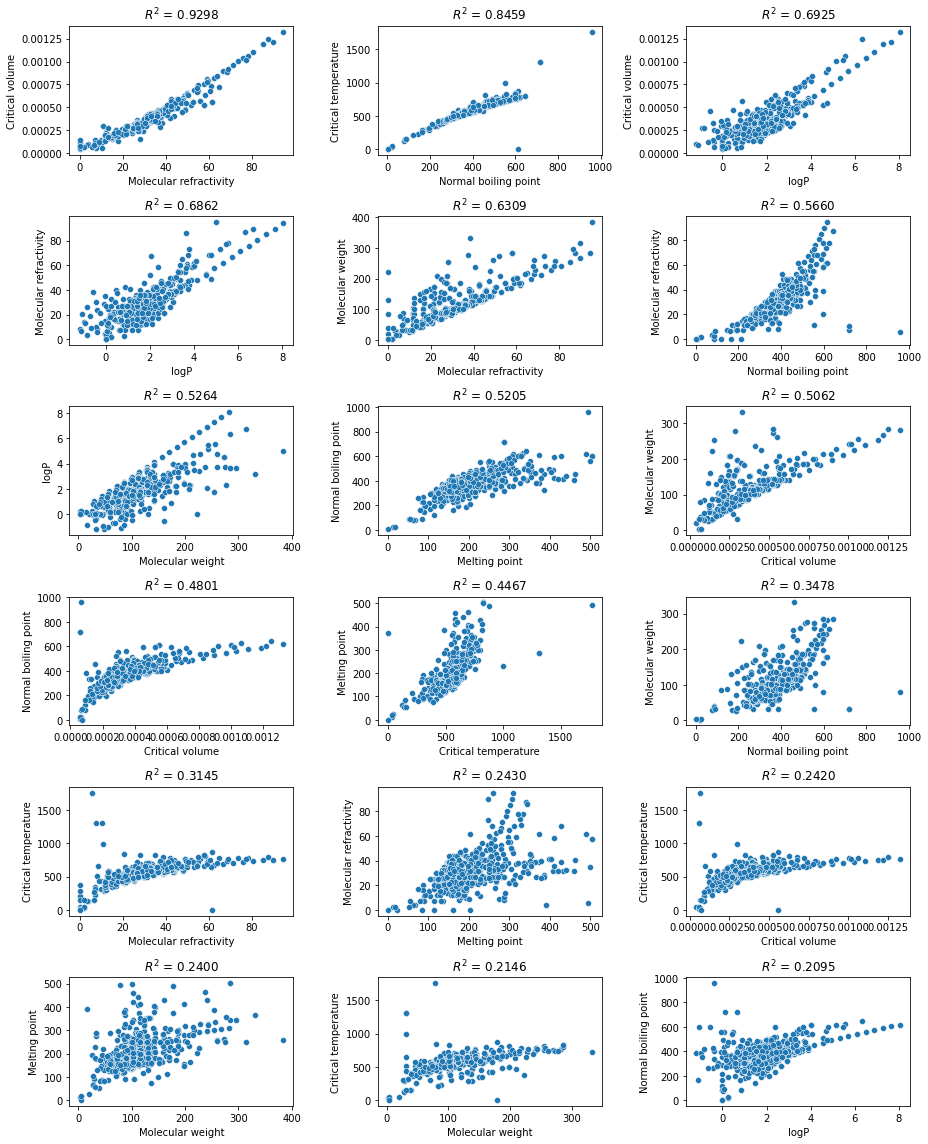

In [19]:
fig = plt.subplots(figsize=(13,16))
count = 1
for i, lst in enumerate(list_corr_c[:18]):
    plt.subplot(6,3,count)
    sns.scatterplot(x=data_c[list_corr_c[i][0]],y=data_c[list_corr_c[i][1]]).set(title='$R^2$ = %1.4f' %val_corr_c[i])
    count+=1

plt.tight_layout()
plt.show()

# Heat of fusion

In [20]:
data_h = data[(data['Heat of fusion'].notna()) & (data['Heat of fusion'] !=0)]
data_h = data_h[num_cols]

In [21]:
data_corr_h = data_h.corr().unstack().sort_values(ascending=False)[9::2]
data_corr_h = data_corr_h **2
data_corr_h = data_corr_h.to_frame().reset_index()
data_corr_h = data_corr_h[(data_corr_h['level_0'] == 'Heat of fusion') | (data_corr_h['level_1'] == 'Heat of fusion')].sort_values(by=[0], ascending=False)
data_corr_h

,level_0,level_1,0
35,Heat of fusion,Critical volume,0.567430
10,Heat of fusion,Critical pressure,0.375857
30,Heat of fusion,logP,0.223221
29,Heat of fusion,Molecular refractivity,0.209674
13,Melting point,Heat of fusion,0.144163
28,Heat of fusion,Normal boiling point,0.121839
27,Heat of fusion,Molecular weight,0.075870
26,Critical temperature,Heat of fusion,0.058089


In [22]:
list_corr_h = data_corr_h[['level_0', 'level_1']].values.astype(str).tolist()[:4]
val_corr_h = data_corr_h[0].to_list()[:4]

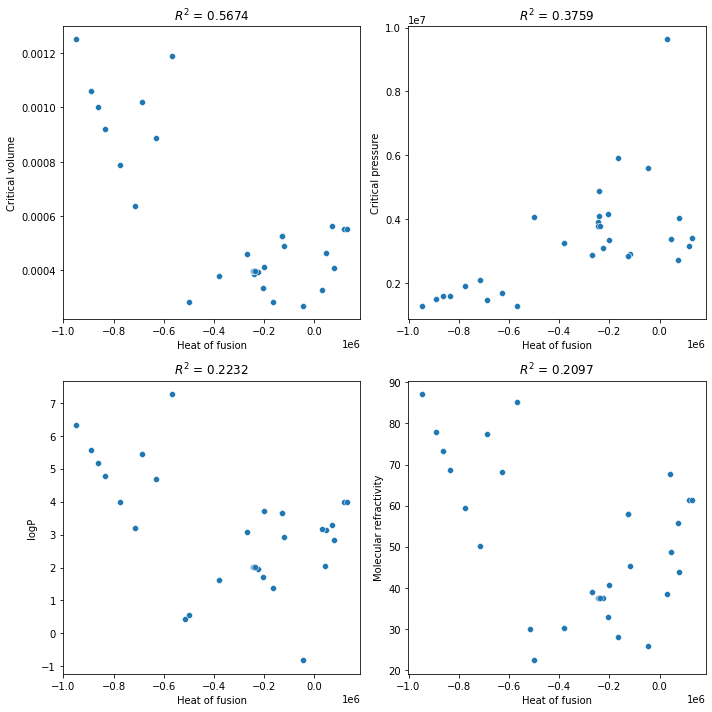

In [23]:
fig = plt.subplots(figsize=(10,10))
count = 1
for i, lst in enumerate(list_corr_h):
    plt.subplot(2,2,count)
    sns.scatterplot(x=data_h[list_corr_h[i][0]],y=data_h[list_corr_h[i][1]]).set(title='$R^2$ = %1.4f' %val_corr_h[i])
    count+=1

plt.tight_layout()
plt.show()